# Skin effect response for an isotropic metal

When an alternating electromagnetic field is applied to a conductor, eddy currents form in channels across its surface, which screen the fields and prevent them from entering into the interior of the conductor. The current density associated with these channels is greatest at the conductor's surface and decrease into the sample, as do the electric and magnetic field strengths. This same effect applied to alternating currents applied to a wire, where at high frequencies the surface of the wire carriers a large portion of the total current.

The surface impedance captures the surface response of the sample via the ratio of the perpendicular electric and magnetic fields at the surface [1]:

$$
Z_s(\omega,t) = R_s(\omega,t) - i X_s(\omega,t) \equiv {\frac{E(z,t)}{H(z,t)}}\rvert_{z=0}
$$
where $E$ and $H$ are the electric and magnetic fields with angular frequency $\omega$, and z is the direction into the sample.

Its real part, the surface resistance, relates to the power dissipation of the sample in the applied electromagnetic fields.

In a good conductor at low enough frequencies, the response is in the classical skin effect regime where:

$$
R_s(\omega) = X_s(\omega,t) = \sqrt{\frac{\mu_0 \omega}{2 \sigma}}
$$
where $\sigma$ is the conductivity of the sample.

The surface impedance can depart from the classical skin effect at high frequencies and when samples are highly conducting.



This notebook is for testing and analyzing the full broadband electromagnetic skin effect response of a metal with a spherical Fermi surface, using the analytic Boltzmann transport calculations developed by Graham Baker and Davide Valentinis [2,3]. We combine these with the 3D isotropic conductivity spectra in [4].

The key quantity is the experimentally-accessible surface resistance spectrum (with diffuse surface scattering) [5]:

$$
R_s(\omega) = \textrm{Re}\left[Z_s(\omega)\right] = \textrm{Re}\left[-i\pi\mu_0\omega\left[\int_0^{\infty} \ln\left(1-i\mu_0\omega\sigma(q,\omega)q^{-2}\right) dq\right]^{-1}\right]
$$,

where $Z_s = R_s - i X_s$ is the complex surface impedance (we are using the negative surface reactance convention), $\omega$ is the applied field angular frequency, $q$ is the electromagnetic wavevector propagating perpendicularly into the sample's surface, and $\sigma(q,\omega)$ is the $q$-dependent conductivity spectra, which has an analytic form for a spherical Fermi surface.

The main purpose is to study how different material quantities (plasma frequency, scattering rate, Fermi velocity, etc.) influence the skin effect response of a metal. In particular, how does the full broadband surface resistance response change as these material properties are changed?

All skin effect regimes are captured in the full response, including the:

- classical skin effect regime (diffusive transport);
- relaxation regime (non-instantaneous transport);
- anomalous skin effect regime (non-local transport);
- anomalous reflection regime (non-local and non-instantaneous transport).

Note that the transmission regime (where $\omega$ is above the plasma frequency) is not included in the full response, as it is far outside of our experimental frequency range.

These regimes are validated against:

1. the analytic limits of $R_s(\omega)$ and $X_s(\omega)$ in each regime;
2. the boundaries in frequency-space between each regime.

Finally, this notebook also serves as a self-consistency test for the above (specifically, comparing the full $R_s(\omega)$ response to the different asymptotic limits). These formulas are then used for calculating $R_s(\omega)$ for spherical and material-dependent Fermi surface meshes in other notebooks.

Sources:

[1] T. W. Branch, Microwave Responses of Strongly Demagnetized Metallic Samples, University of British Columbia, 2021.http://hdl.handle.net/2429/79520

[2] G. Baker, Non-Local Electrical Conductivity in PdCoO$_{2}$, University of British Columbia, 2022. DOI:10.14288/1.0421263

From this, we take:
- The surface impedance integral for diffuse surface scattering, combined with the formulas from Hein et al.;
- The surface impedance formulas in the limits of different skin effect regimes;
- The formulas for the boundaries between different skin effect regimes.

[3] D. Valentinis, G. Baker, D. A. Bonn, and J. Schmalian, Kinetic theory of the nonlocal electrodynamic response in anisotropic metals: Skin effect in 2D systems, Physical Review Research 5, 013212 (2023). DOI:10.1103/PhysRevResearch.5.013212

[4] M. A. Hein, R. J. Ormeno, and C. E. Gough, High-frequency electrodynamic response of strongly anisotropic clean normal and superconducting metals, Phys. Rev. B 64, 024529 (2001). DOI:10.1103/PhysRevB.64.024529

[5] R. B. Dingle, The anomalous skin effect and the reflectivity of metals I, Physica 19, 311 (1953).

# Options

## Figure options
Options for figures, such as format, and whether or not to save them (for testing).

In [1]:
## Figure template name: select template to use
figure_template_name = 'DissertationTextwidthWide'

## Save the figures, or just generate them?
save_figures = False

# Imports, Definitions and Plotting Details
Include imports for the libraries, otherwise the code editor will not see the libraries.
Define some things:
- useful units
- reference sample dimensions
- figure directory
- microwave data directory
- microwave catalogue
- sample catalogue

## General imports and definitions
To ensure that the code editor recognises the libraries, they must be imported here.

In [2]:
## Core
import numpy as np
import pandas as pd

from scipy import constants

## Valuable constants
from scipy.constants import pi, hbar, physical_constants, mu_0, m_e, angstrom, electron_volt, elementary_charge, epsilon_0, c
ec = elementary_charge
ep_0 = epsilon_0

## System type libraries
import os
import sys

## Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display

In [3]:
# Get the current working directory
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

# Add the parent directory to the system path, for importing my own custom libraries
sys.path.append(os.path.dirname(current_directory))

### Common colours for plots

In [4]:
from src import figure_helper as fh

viridis = mpl.colormaps['viridis']
AgAu_color = fh.colour_AgAu

ModuleNotFoundError: No module named 'src'

## Specific imports
These are less often needed, so can usually be removed.

In [1]:
## Math
import json

## Custom libraries
Import my custom libraries here.

In [3]:
## My libraries
from src import numerical_fermi_surface_utilities as fs
from src import electronic_transport as et

ModuleNotFoundError: No module named 'src'

In [8]:
## Helps with testing modules in development
%load_ext autoreload
%autoreload 2

## Units and definitions
Define some helpful units and relevant quantities to use later.

In [9]:
## Define some units
nm = 1e-9
um = 1e-6
mm = 1e-3
GHz = 1e9
MHz = 1e6

uOhmcm = 1e-6*1e-2

Bohr_radius = constants.physical_constants['Bohr radius'][0]
eV_Angstrom_per_hbar = 151927 # eV * Angstrom / hbar = 151927 m/s
degrees = pi/180
radians = 180/pi

## Directories
Define directories
- Where to save the figures (correct path for different machines)
- Location of the cleaned, joined and cut microwave spectra
- Locations of the microwave run catalogue and the microwave sample catalogue

### Figure directory

In [11]:
## Save the figures into the subfolder with this notebooks figure folder name
figure_directory = os.path.join(parent_directory, 'figures')

### Figure labels
Common figure labels generated as strings, for ease of use and consistency

In [14]:
from Libraries import common_plot_labels as label_lib

# Select which Fermi surface model to investigate
This is simply for the calculation parameters in this notebook, and the mesh data are not used.

In [16]:
## Select a Fermi surface model
FS_model = 'Sodium_Free_Electron'

Select(description='FS Model:', layout=Layout(height='300px', width='70%'), options=(('ReO3_DFT_02_alpha-sheet…

Sphere_Basic_01


Selected FS Model: Sodium_Free_Electron


# Select frequencies to calculate

In [18]:
f_min, f_max, f_num = 1e-6*GHz, 1e4*GHz, 2 # Hz

In [19]:
freq_calculate = np.logspace(np.log10(f_min), np.log10(f_max), f_num)
omega_calculate = 2*pi*freq_calculate

# Select resitvitity of the material

In [20]:
resistivity = 2*1e-9*1e-2 # Ohm m

## Filename suffix

In [21]:
## Additional figure filename label if needed (before extension)
figure_filename_suffix = 'ASE'

# Determine analytic quantities
For a spherical free-electron band dispersion:
$$ E_F = \frac{\hbar^2}{2 m_e} k_F^2 $$
$$ v_F = \frac{\hbar}{m_e} k_F $$

In [23]:
## Info for spherical model
##TODO: Move these to a json file
if FS_model == 'Sphere_Basic_01':
    m_effs = m_e*np.array([1,1,1])
    m_eff_analytic = m_effs[0]
    k_F_analytic = 1/angstrom
    E_F_analytic = (hbar**2/2)*k_F_analytic**2/m_e
    v_F_analytic = hbar*k_F_analytic/m_e

    ## For a sphere of radius 1 angstrom
    volume_analytic = 4/3*np.pi*k_F_analytic**3
    area_analytic = 4*np.pi*k_F_analytic**2

    ## Plasma frequency
    ep_omega_plasma_squared = (elementary_charge**2/(12*pi**3*hbar))*area_analytic*v_F_analytic
    freq_plasma_analytic = np.sqrt(ep_omega_plasma_squared/epsilon_0)

    ## Charge carrier density from sphere
    n_cc_analytic = (1/(3*pi**2))*k_F_analytic**3

    ## From k_F volume integral
    n_cc_analytic_vol = 3*(1/(12*pi**3))*volume_analytic

    ## From k_F surface integral
    n_cc_analytic_area = (1/(12*pi**3))*area_analytic*k_F_analytic

    ## Charge carrier density, from plasma freq
    n_cc_analytic_plasma = (m_eff_analytic/elementary_charge**2)*ep_omega_plasma_squared

    gamma_MR_analytic = resistivity*ep_omega_plasma_squared
    l_MR_analytic = v_F_analytic/gamma_MR_analytic
    
elif FS_model == 'Sodium_Free_Electron':
    ##TODO: Change this to a json file
    k_F_analytic = 0.922/angstrom
    m_eff_analytic = m_e
    E_F_analytic = (hbar**2/2)*k_F_analytic**2/m_e
    
    v_F_analytic = hbar*k_F_analytic/m_e

    ## For a sphere of radius 1 angstrom
    volume_analytic = 4/3*np.pi*k_F_analytic**3
    area_analytic = 4*np.pi*k_F_analytic**2

    ## Plasma frequency
    ep_omega_plasma_squared = (elementary_charge**2/(12*pi**3*hbar))*area_analytic*v_F_analytic
    freq_plasma_analytic = np.sqrt(ep_omega_plasma_squared/epsilon_0)

    ## Charge carrier density from sphere
    n_cc_analytic = (1/(3*pi**2))*k_F_analytic**3

    ## From k_F volume integral
    n_cc_analytic_vol = 3*(1/(12*pi**3))*volume_analytic

    ## From k_F surface integral
    n_cc_analytic_area = (1/(12*pi**3))*area_analytic*k_F_analytic

    ## Test transport properties
    gamma_MR_analytic = resistivity*ep_omega_plasma_squared
    l_MR_analytic = v_F_analytic/gamma_MR_analytic

skin_depth_London = c/freq_plasma_analytic

print(f'Analytic volume: {volume_analytic:.4e} angstroms^3')
print(f'Analytic area: {area_analytic:.4e} angstroms^2')
print(f'Analytic v_F: {v_F_analytic:.4e} m/s')

print('Comparison of charge carrier densities')
print(f'From sphere filling in k space: {n_cc_analytic:.4e} 1/m^3')

print(f'Analytic freq_plasma: {freq_plasma_analytic:.4e} Hz')
print(f'Analytic n_cc: {n_cc_analytic/angstrom**3:.4e} 1/angstroms^3')

print('\n')
print(f'For residual resistivity: {resistivity/(1e-9*1e-2):.2e} nOhm cm')
print(f'Analytic gamma: {gamma_MR_analytic/GHz:.4e} GHz')
print(f'Analytic l_MR: {l_MR_analytic/um:.4e} um')
print(f'London skin depth: {skin_depth_London/um:.4e} um')

Analytic volume: 4.1888e+30 angstroms^3
Analytic area: 1.2566e+21 angstroms^2
Analytic v_F: 1.1577e+06 m/s
Comparison of charge carrier densities
From sphere filling in k space: 3.3774e+28 1/m^3
From k_F volume integral:       3.3774e+28 1/m^3
From k_F SA integral:           3.3774e+28 1/m^3
Analytic freq_plasma: 1.0368e+16 Hz
Analytic n_cc: 3.3774e+58 1/angstroms^3


For residual resistivity: 2.00e+00 nOhm cm
Analytic gamma: 1.9034e+01 GHz
Analytic l_MR: 6.0820e+01 um
London skin depth: 2.8916e-02 um
4206.653120743139


In [24]:
## Create strings for the figures
string_resistivity_full = r'$\rho_0 =$ ' + fh.format_resistivity_latex(resistivity)
string_l_MR_full = r'$\ell_{MR} =$ ' + fh.format_length_latex(l_MR_analytic)
string_gamma_MR_full = r'$\gamma_{MR} =$ ' + fh.format_frequency_latex(gamma_MR_analytic)

string_gamma_l = string_gamma_MR_full + ', ' + string_l_MR_full

## Calculate skin effect regime boundaries
From pg. 50.

In [26]:
skin_effect_regime_boundaries = et.get_skin_effect_regime_frequency_boundaries(freq_plasma_analytic, v_F_analytic, l_MR_analytic)
freq_relaxation = skin_effect_regime_boundaries["CSE, Relaxation (scattering rate)"]
freq_C_to_A_Rs_diffuse = skin_effect_regime_boundaries["CSE, ASE (Rs_CSE = Rs_ASE_diffuse)"]
freq_C_to_A_Rs_specular = skin_effect_regime_boundaries["CSE, ASE (Rs_CSE = Rs_ASE_specular)"]
freq_C_to_A_length_scale = skin_effect_regime_boundaries["CSE, ASE (l_MR = delta)"]
freq_A_to_EA = skin_effect_regime_boundaries["ASE, Anomalous Reflection (scattering rate)"]

gamma_MR_R_to_EA = (v_F_analytic/skin_depth_London)

print(f'Scattering rate: {gamma_MR_analytic/GHz:.2f} GHz')
print(f'Relaxation boundary: {freq_relaxation/GHz:.2f} GHz')
print(f'CSE to ASE boundary (length scale): {freq_C_to_A_length_scale/GHz:.2e} GHz')
print(f'CSE to ASE boundary (Rs): {freq_C_to_A_Rs_specular/GHz:.2e} GHz')
print(f'ASE to EASE boundary: {freq_A_to_EA/GHz:.2f} GHz')

Scattering rate: 19.03 GHz
Relaxation boundary: 3.03 GHz
CSE to ASE boundary (length scale): 1.37e-06 GHz
CSE to ASE boundary (Rs): 1.46e-04 GHz
ASE to EASE boundary: 6371.88 GHz
 40035.71, 19.03


# Analytic conductivity spectra: From Hein, Ormeno, and Gough equations (PRB 64 024529 (2001))

In [27]:
## These values work well
num_ql = 200
ql_min = -3
ql_max = 6

ql = np.logspace(ql_min, ql_max, num_ql)  # Dimensionless product of wavevector and mean free path
q_calculate = ql/l_MR_analytic
ql_interp = np.logspace(ql_min - 1, ql_max + 1, num_ql*2)
q_interp = ql_interp/l_MR_analytic

## Includes relaxation effects
q_prime = et.q_prime_func(q_calculate, omega_calculate, l_MR_analytic, gamma_MR_analytic)

print(f'ql shape: {ql.shape}')
print(f'omega shape: {omega_calculate.shape}')

nonlocality_term = et.nonlocality_term_3D_isotropic_func(q_prime)

cond_spectra_3D_isotropic = et.cond_spectrum_3D_isotropic(q_calculate, omega_calculate, l_MR_analytic, gamma_MR_analytic, resistivity)

## For the calculation
def cond_spectra_3D_isotropic_func(q, omega):
    return et.cond_spectrum_3D_isotropic(q, omega, l_MR_analytic, gamma_MR_analytic, resistivity)

ql shape: (200,)
omega shape: (2,)


# Plots of conductivity spectra

## Compare calculations to Drude response

<Figure size 640x480 with 0 Axes>

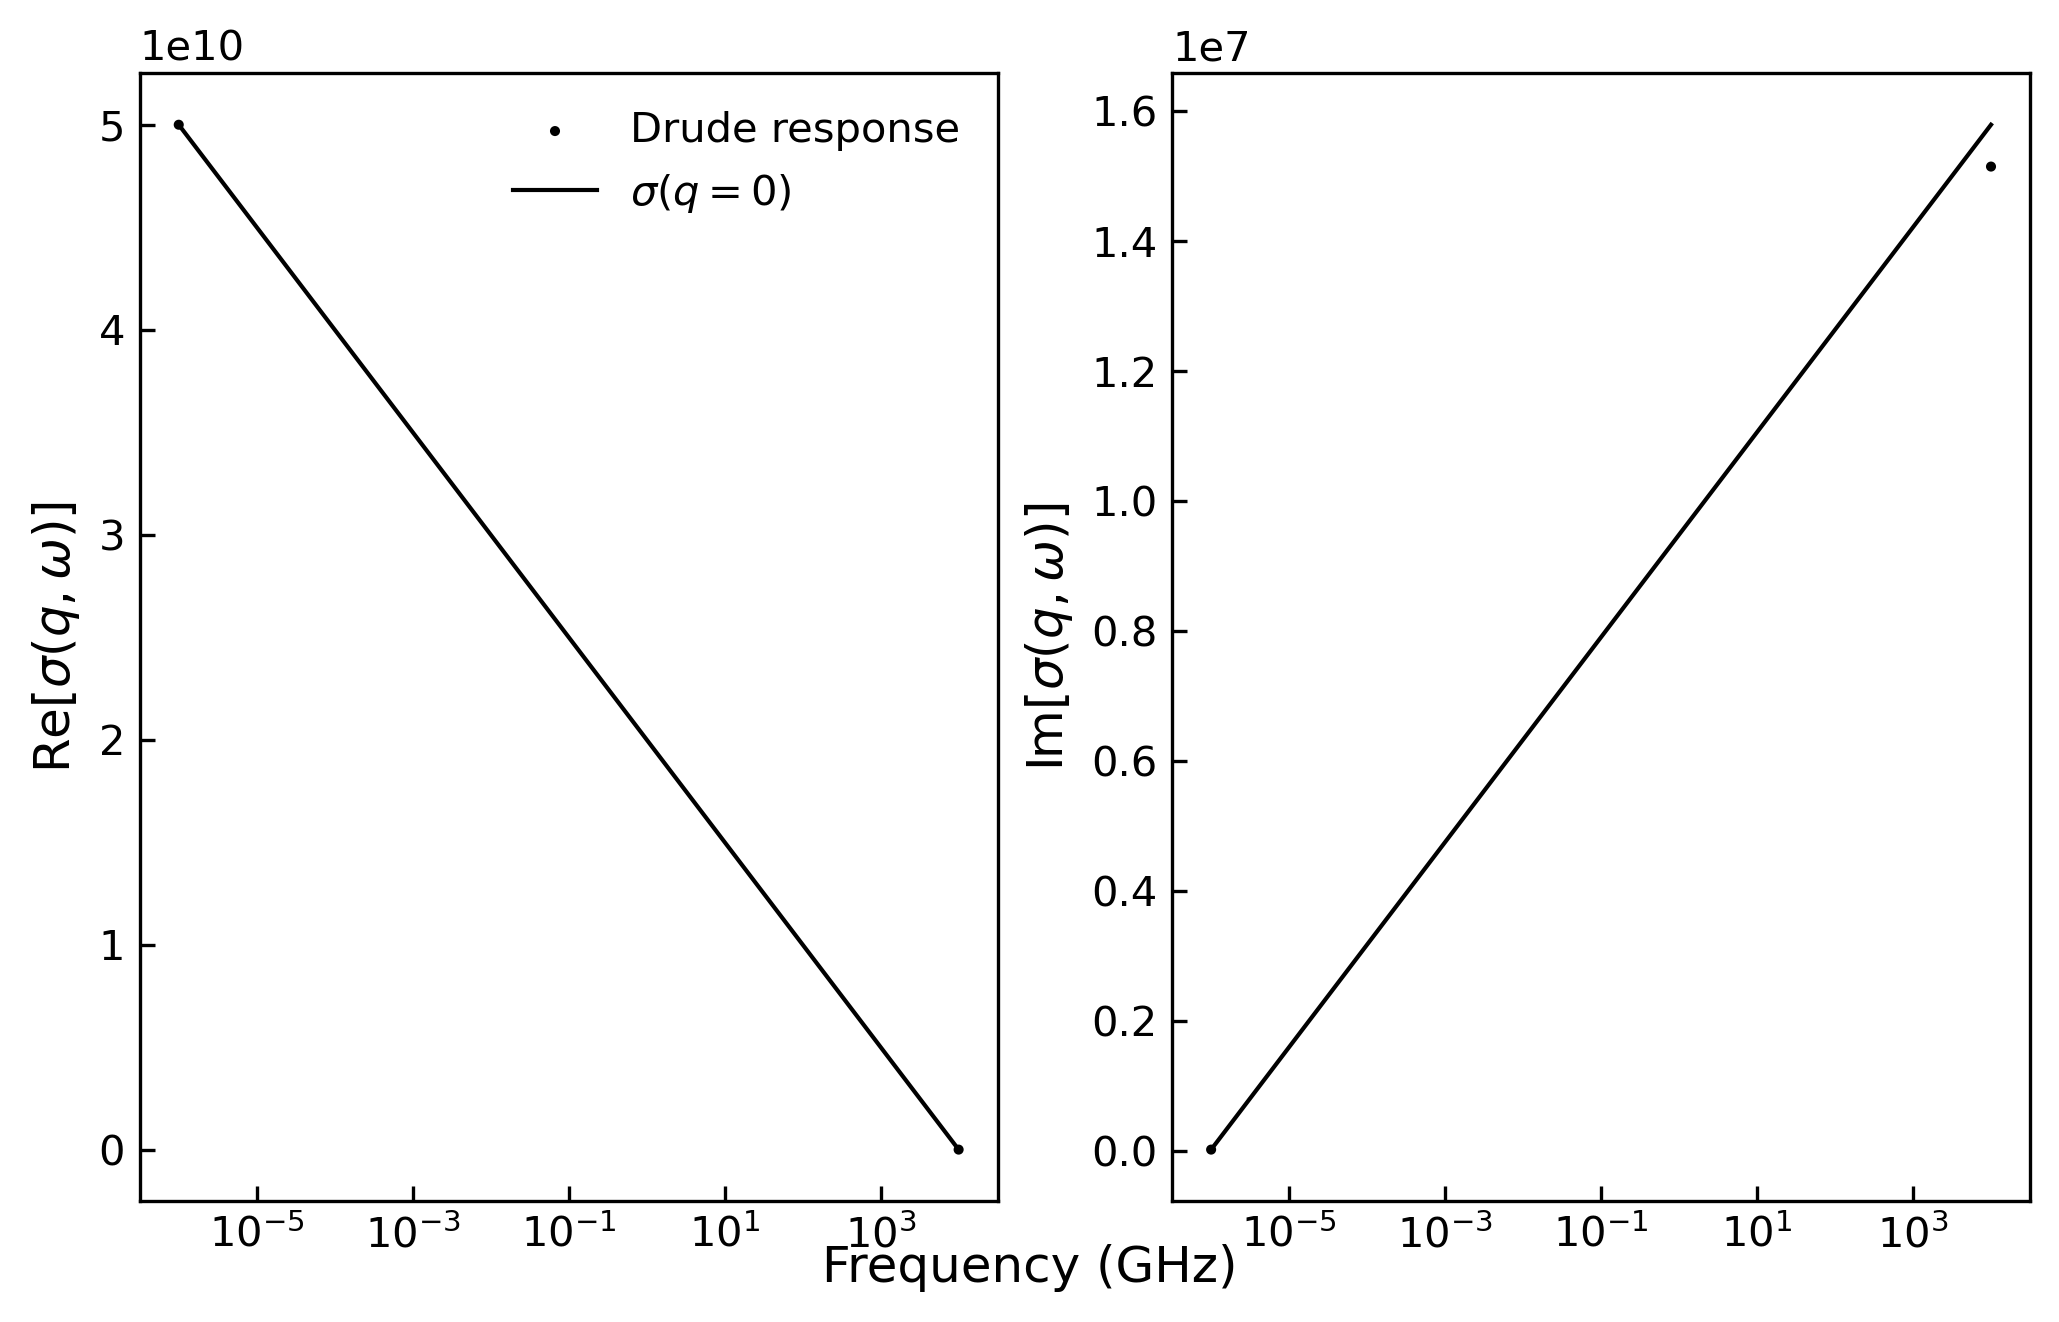

In [28]:
## Sign of denominator is changed
cond_relaxation = (resistivity)**-1 / (1 - 1j * omega_calculate / gamma_MR_analytic)

cond_spectra_3D_q0_limit = cond_spectra_3D_isotropic[0,:]

cond_error = (cond_spectra_3D_q0_limit - cond_relaxation)/cond_relaxation

freqs_plot = freq_calculate/GHz
y_plot1 = cond_relaxation
y_plot2 = cond_spectra_3D_q0_limit

fh.set_plot_template('2ColWide')
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)

ax1.scatter(freqs_plot, y_plot1.real, color='k', s=2, linestyle='', label='Drude response')
ax1.plot(freqs_plot, y_plot2.real, color='k', label=r'$\sigma(q=0)$')

ax2.scatter(freqs_plot, y_plot1.imag, color='k', s=2, linestyle='', label='Drude response')
ax2.plot(freqs_plot, y_plot2.imag, color='k', label=r'$\sigma(q=0)$')

ax1.set_ylabel(r'Re$[\sigma(\omega)]$')
ax2.set_ylabel(r'Im$[\sigma(\omega)]$')

fig.suptitle(label_lib.f_GHz, y=0.02, ha='center')

for ax in [ax1, ax2]:
    ax.set_xscale('log')

ax1.legend()

# figure_filename = FS_model + f'_Hein_Xs_BakerScale{figure_name_suffix}.svg'
# figure_filepath = os.path.join(figure_directory, figure_filename)
# fh.save_svg(figure_filepath)

plt.show()

## Plot the error in the q=0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2025x1251.55 with 0 Axes>

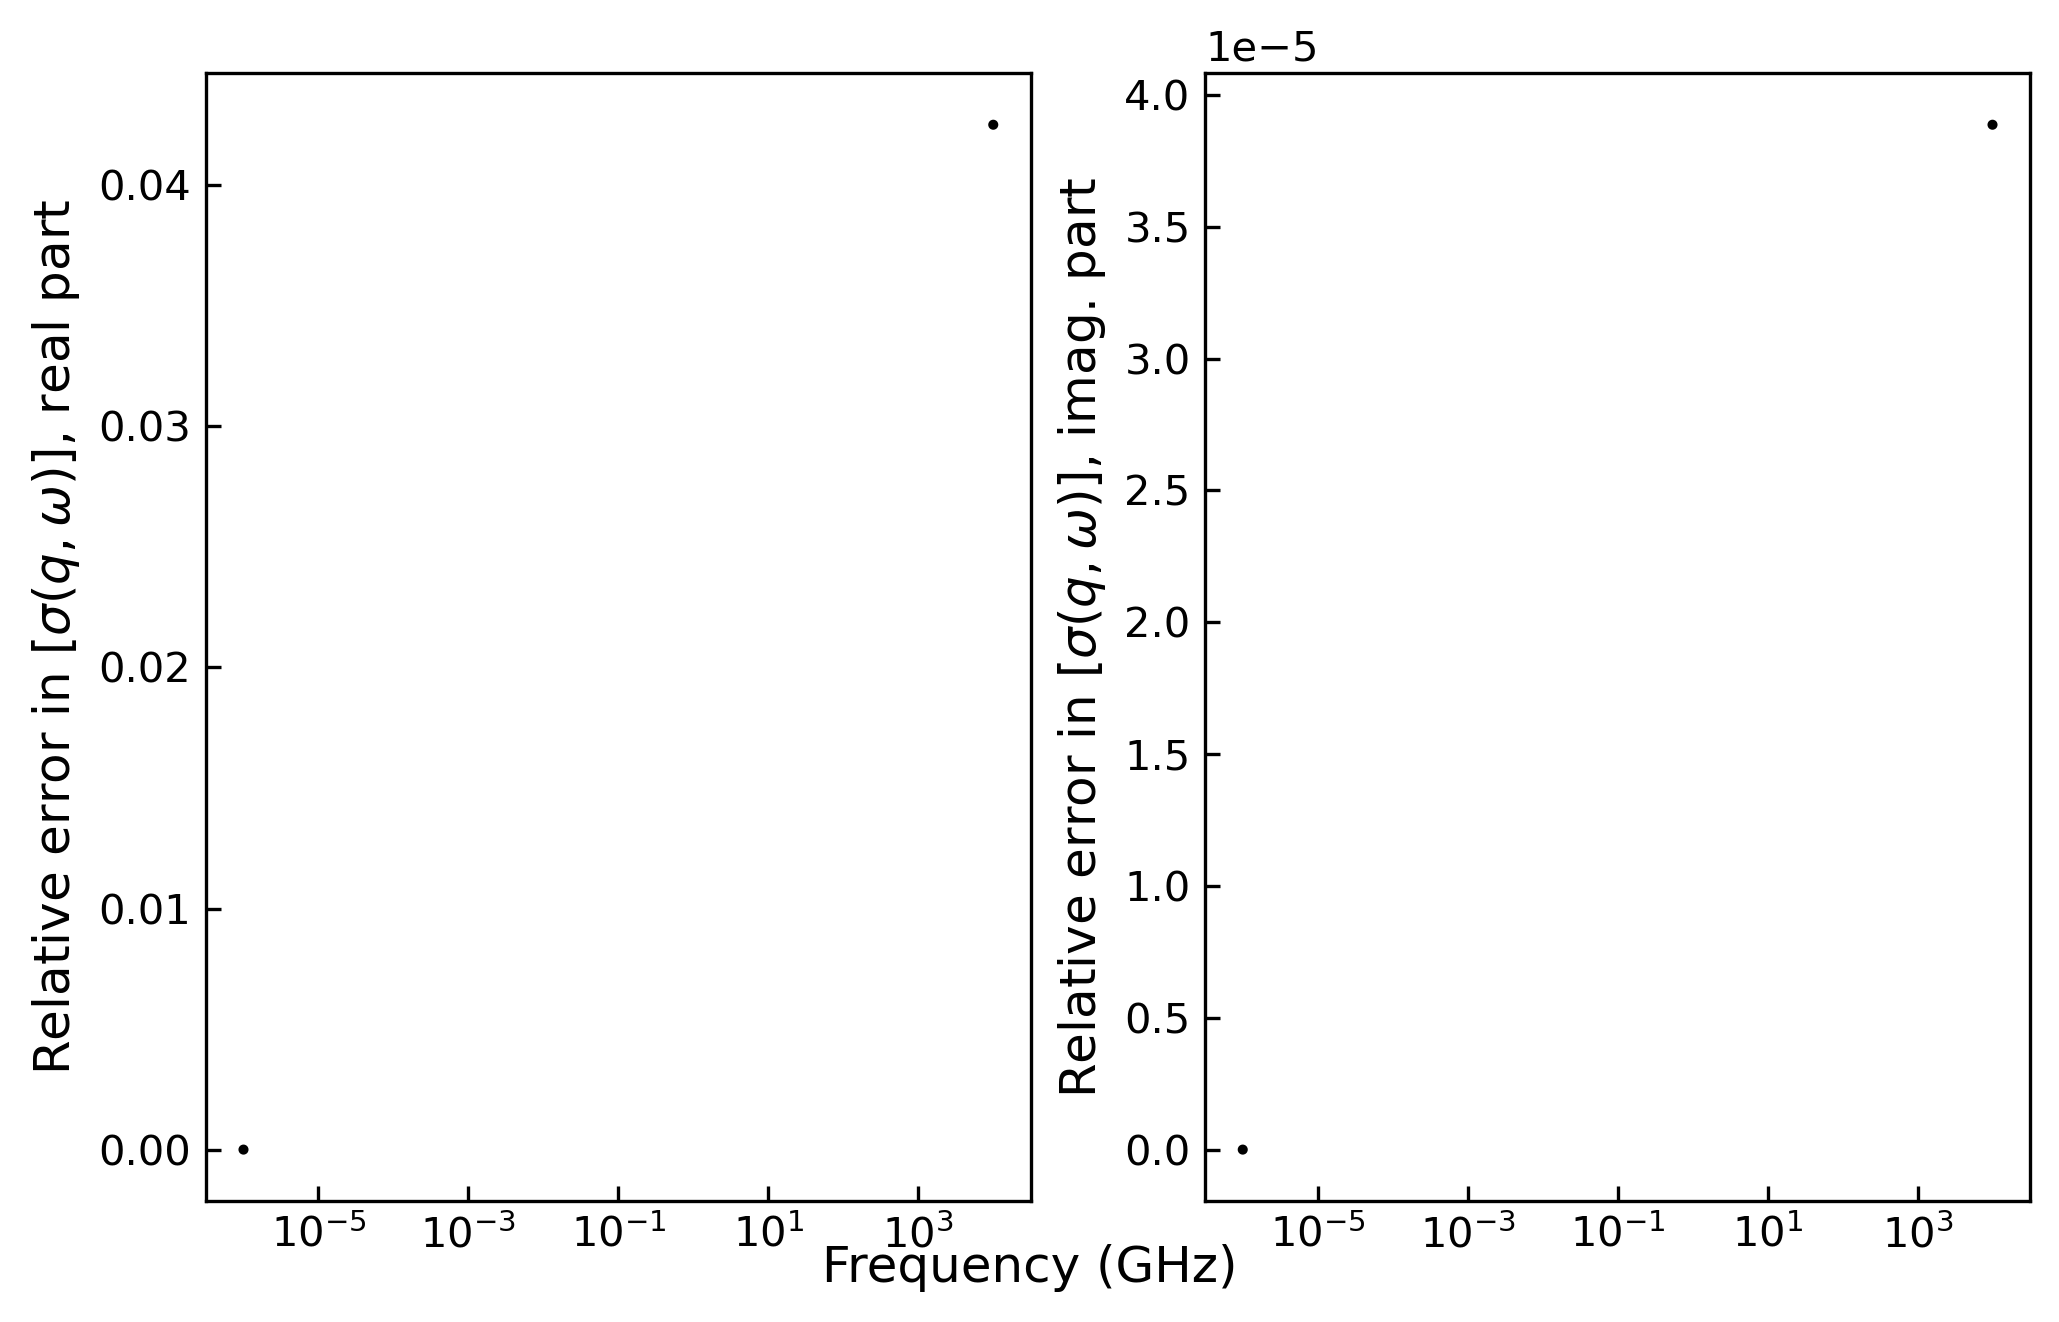

In [29]:
fh.set_plot_template('2ColWide')
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)

y_plot = cond_error

ax1.scatter(freqs_plot, y_plot.real, color='k', s=2, linestyle='')
ax2.scatter(freqs_plot, y_plot.imag, color='k', s=2, linestyle='')

ax1.set_ylabel(r'Relative error in $[\sigma(q,\omega)]$, real part')
ax2.set_ylabel(r'Relative error in $[\sigma(q,\omega)]$, imag. part')

for ax in [ax1, ax2]:
    ax.set_xscale('log')

fig.suptitle(label_lib.f_GHz, y=0.02, ha='center')

ax1.legend()

# figure_filename = FS_model + f'_Hein_Xs_BakerScale{figure_name_suffix}.svg'
# figure_filepath = os.path.join(figure_directory, figure_filename)
# fh.save_svg(figure_filepath)

plt.show()

## Plot the conductivity spectrum at a specified frequency

For the limit of $q \ell_{MR} \gg 1$ the real and imaginary parts of the conductivity spectrum are:

$$\Re(\sigma(q, \omega)) = \sigma_{DC} \frac{3\pi}{4}\left(\frac{1}{q\ell_{\text{MR}}}\right)^1$$
$$\Im(\sigma(q, \omega)) = \sigma_{DC} 3 \frac{\omega}{\gamma_{\text{MR}}}\left(\frac{1}{q\ell_{\text{MR}}}\right)^2$$

Sphere_Basic_01_Analytic_CondSpectrum_Log-Log_2.000e+00nOhmcm_ASE
3.300951025347442e-07


<Figure size 2025x1251.55 with 0 Axes>

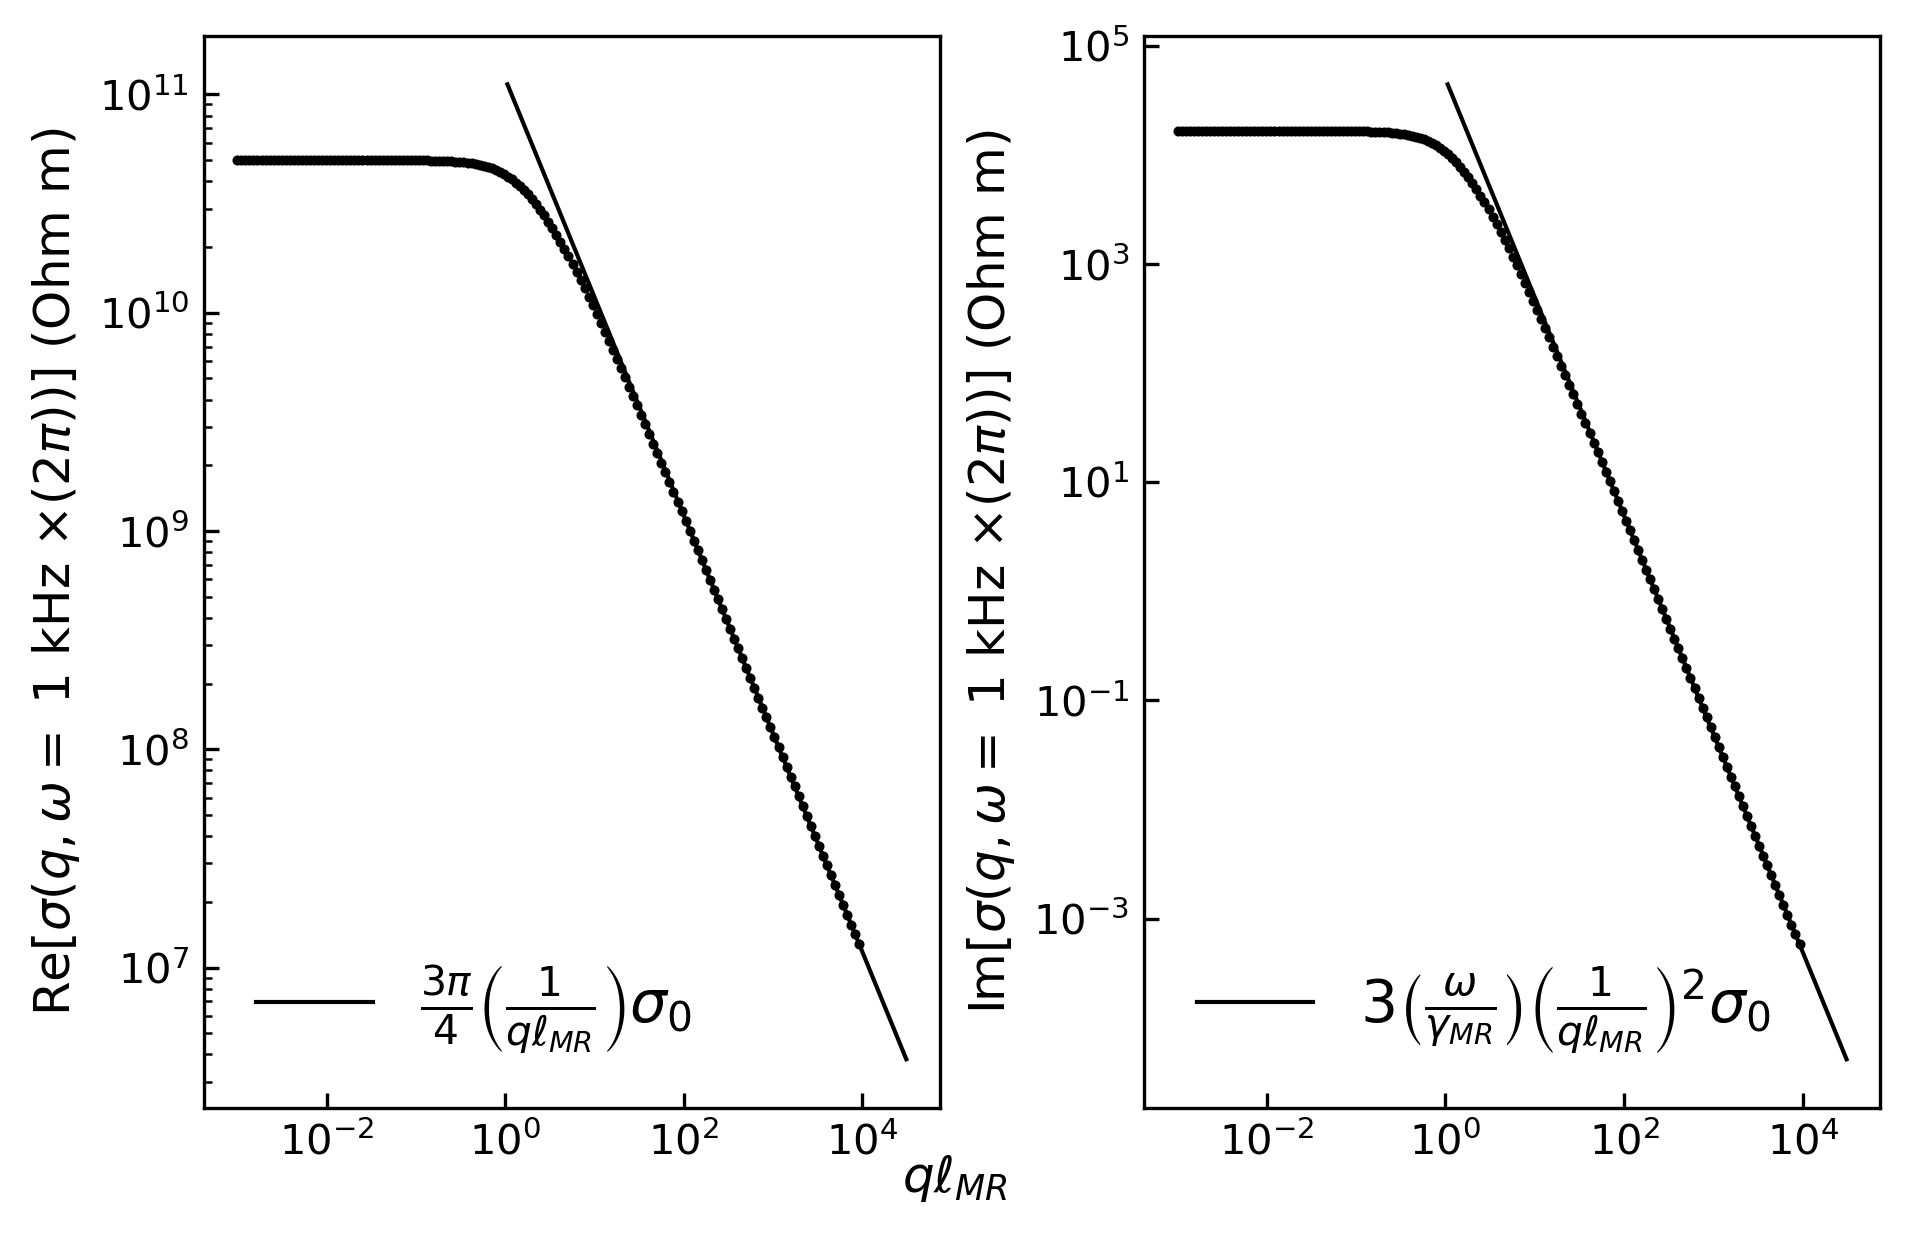

In [31]:
freq_plot_desired = [20*GHz]
i_freq = fs.find_closest_indices(freq_calculate, freq_plot_desired)[0]
freq_plot = freq_calculate[i_freq]
omega_plot = 2*pi*freq_plot

string_freq_plot = fh.format_frequency_latex(freq_plot)
string_cond_plot = r'$\sigma(q,\omega =$ ' + string_freq_plot + r' $\times (2\pi))$'

cond_spectra_3D_isotropic_high_q_complex = et.cond_spectra_3D_isotropic_high_q_complex(ql_interp, freq_plot, resistivity, freq_plasma_analytic)

sigma_interp_func_theory_extrapolate = imp.gen_sigma_interp_func_theory_extrapolate(q_calculate,cond_spectra_3D_isotropic[:,i_freq])


filter_y_plot1 = (ql <=1e4)
filter_y_plot2 = (ql_interp >= 1) & (ql_interp <=10**(4.5))

x_plot = ql[filter_y_plot1]
y_plot1 = (cond_spectra_3D_isotropic[:,i_freq])[filter_y_plot1]

x_plot_2 = ql_interp[filter_y_plot2]
y_plot2 = (cond_spectra_3D_isotropic_high_q_complex.real)[filter_y_plot2]
x_plot_3 = ql_interp[filter_y_plot2]
y_plot3 = (cond_spectra_3D_isotropic_high_q_complex.imag*1j)[filter_y_plot2]


fh.set_plot_template(figure_template_name)
plt.rcParams['legend.fontsize'] = 14
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)

ax1.scatter(x_plot, y_plot1.real, color='k', s=2)
# ax1.plot(x_plot_2, y_plot2.real, color='k', label=r'$\Re(\sigma_\omega \frac{3 \pi}{4 q\prime})$')
ax1.plot(x_plot_2, y_plot2.real, color='k', label=r'$\frac{3 \pi}{4}\left(\frac{1}{q \ell_{MR}}\right)\sigma_0$')

ax2.scatter(x_plot, y_plot1.imag, color='k', s=2)
# ax2.plot(x_plot_3, y_plot3.imag, color='k', label=r'$\frac{3}{2} \frac{\omega}{\gamma_{MR}} \left(\frac{1}{q \ell_{MR}}\right)^2$')
ax2.plot(x_plot_3, y_plot3.imag, color='k', label=r'$3 \left(\frac{\omega}{\gamma_{MR}}\right) \left(\frac{1}{q \ell_{MR}}\right)^2\sigma_0$')

ax1.set_ylabel(r'Re$[$' + string_cond_plot + '$]$ (Ohm m)')
ax2.set_ylabel(r'Im$[$' + string_cond_plot + '$]$ (Ohm m)')

for ax in [ax1, ax2]:
    ax.set_xscale('log')
    ax.set_yscale('log')

fig.suptitle(r'$q \ell_{MR}$', y=0.02, ha='center')

ax1.legend(loc='lower left')
ax2.legend(loc='lower left')

figure_filename = FS_model + f'_Analytic_CondSpectrum_Log-Log_{resistivity/1e-11:.3e}nOhmcm_{figure_filename_suffix}'
print(figure_filename)
filepath_figure_base = os.path.join(figure_directory, figure_filename)
if save_figures: fh.save_figure_as_svg_png_pdf(filepath_figure_base)

print(omega_plot/gamma_MR_analytic)

plt.show()

## Calculate the analytic surface impedance for diffuse surface scattering
Using the full conductivity spectra formulas.
This way takes far more time compared to the interpolation versions, and can be skipped. These are used for comparison to verify the interpolated calculation agrees.

In [34]:
## This fun
def Zd_func(omega, sigma_func, maxdegree=10):
    """
    Surface impedance for diffuse surface scatttering.
    """
    def integrand_func(q):
        return mp.log(1-1j*mu_0*omega*sigma_func(q, omega)*q**-2)
    integral = mp.quad(lambda q: complex(integrand_func(q)), [0, mp.inf], maxdegree=maxdegree) ## Added complex variable support
    return -1j*mu_0*omega*pi/complex(integral)

## Calculate the surface impedance using the slow way.
## I need permission from Graham to implement the fast interpolation method he worked on for his dissertation.
Zs_diffuse_isotropic = Zd_func(omega_calculate, cond_spectra_3D_isotropic_func, maxdegree=10)

# Calculate analytic limits of different surface impedance limits
From Graham's thesis page 21

In [35]:
Z_limits = et.get_skin_effect_regime_limits(freq_calculate, resistivity, freq_plasma_analytic, v_F_analytic, gamma_MR_analytic)

Z_CSE = Z_limits["CSE"]
Z_ASE_diffuse = Z_limits["ASE (diffuse surface scattering)"]
Z_relaxation_limit = Z_limits["Relaxation"]
Z_relaxation_full = Z_limits["Local transport (Drude response)"]
Z_anomalous_reflection = Z_limits["Anomalous reflection (diffuse surface scattering)"]

# Plot the $Z_s$ spectra

In [36]:
freqs_plot = freq_calculate
Baker_scale = fh.Baker_scale(freqs_plot/GHz)

## Set up all the plotting info
##TODO: Move some of this to a separate module
linestyle_full = 'solid'
linestyle_CSE = 'dashed'
linestyle_ASE = '-.'
linestyle_relax_full = '-.'
linestyle_relax = 'dotted'
linestyle_AnRefl = 'dotted'

# Map regimes to linestyles
regime_linestyles = {
    'CSE': linestyle_CSE,
    'ASE (diffuse surface scattering)': linestyle_ASE, 
    'Relaxation limit': linestyle_relax,
    'Local transport (Drude response)': linestyle_relax_full,
    'Anomalous reflection (diffuse surface scattering)': linestyle_AnRefl,
    'Full response': linestyle_full,
}

regime_labels = {
    'CSE': 'CSE regime limit',
    'ASE (diffuse surface scattering)': 'ASE regime limit',
    'Relaxation limit': 'Relaxation regime limit',
    'Local transport (Drude response)': 'Local limit response',
    'Anomalous reflection (diffuse surface scattering)': 'AR regime limit',
    'Full response': 'Full response',
}

regime_Zs_map = {
    'CSE': Z_CSE,
    'ASE (diffuse surface scattering)': Z_ASE_diffuse,
    'Relaxation limit': Z_relaxation_limit,
    'Local transport (Drude response)': Z_relaxation_full,
    'Anomalous reflection (diffuse surface scattering)': Z_anomalous_reflection,
    'Full response': Zs_diffuse_isotropic,
}



In [48]:
## Specific helper function
def plot_Zs_regime_limits(list_regime_names, freqs, Rs_scale, part='real', color='k', freq_filter=None):
    """Plot surface impedance limits for specified regimes.
    
    Parameters
    ----------
    list_regime_names : list of str
        Names of regimes to plot
    freqs : array_like
        Frequency points to plot
    Rs_scale : float
        Scale factor for impedance values
    part : str, optional
        Which part of impedance to plot - 'real' or 'imag' (default: 'real')
    color : str, optional
        Color of plotted lines (default: 'k')
    freq_filter : tuple, optional
        (min_freq, max_freq) to filter frequency range (default: None)
    """
    # Map regime names to corresponding Z values
    
    # Apply frequency filter if provided
    if freq_filter is not None:
        min_freq, max_freq = freq_filter
        mask = (freqs >= min_freq) & (freqs <= max_freq)
        freqs_plot = freqs[mask]
    else:
        freqs_plot = freqs
    
    for regime_name in list_regime_names:
        if regime_name in regime_Zs_map:
            Z = regime_Zs_map[regime_name]
            Z_part = Z.real if part == 'real' else Z.imag
            if freq_filter is not None:
                Z_part = Z_part[mask]
            ax.plot(freqs_plot, Z_part/Rs_scale,
                   color=color, 
                   linestyle=regime_linestyles[regime_name],
                   label=regime_labels[regime_name])
            
list_regime_names = [
                    'CSE',
                    'ASE (diffuse surface scattering)',
                    # 'Local transport (Drude response)',
                    # 'Relaxation limit',
                    'Anomalous reflection (diffuse surface scattering)'
]

##TODO: Move to labels module
label_AR_boundary = r'$(v_F/c) \omega_{p}/(2\pi)$'

## $R_s(f)$ log-log

$\rho_0 =$ $2~\mathrm{n\Omega\;\mathrm{cm}}$
$\ell_{MR} =$ $60.8~\mathrm{\mu m}$
$\gamma_{MR} =$ $19~\mathrm{GHz}$
2.9241278168766813e-07 0.2498155612813016
Sphere_Basic_01_Analytic_Rs_Log-Log_2.000e+00nOhmcm_ASE


<Figure size 2025x1251.55 with 0 Axes>

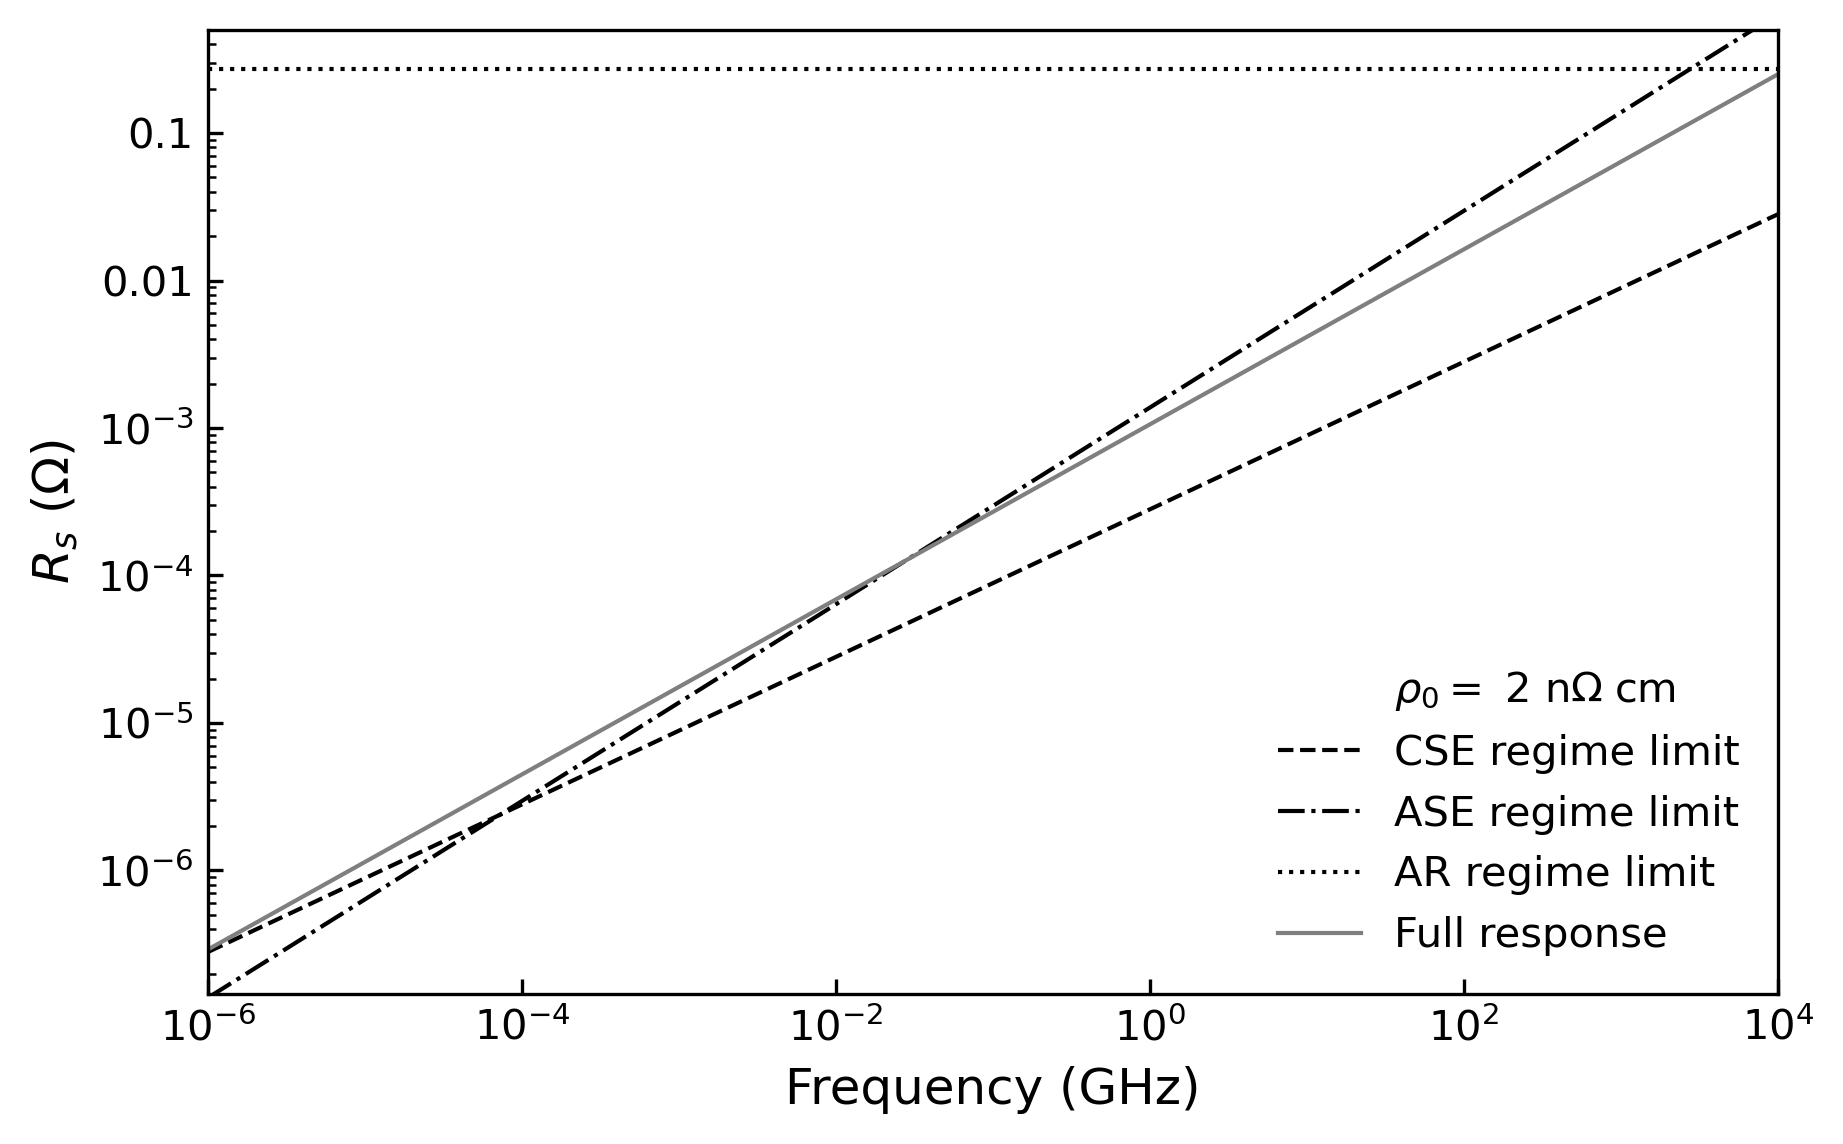

In [54]:
list_regime_names_plot = list_regime_names.copy()
Rs_scale = 1
freq_scale = GHz
freqs_plot = freq_calculate/freq_scale
freq_filter = f_min/GHz, f_max/GHz
freq_mask = (freqs_plot > freq_filter[0]) & (freqs_plot < freq_filter[1])

fh.set_plot_template('2ColWide')
fig, ax = plt.subplots()


print(string_resistivity_full)
print(string_l_MR_full)
print(string_gamma_MR_full)

# ax.plot([], [], alpha=0, label = string_gamma_l)
ax.plot([], [], alpha=0, label = string_resistivity_full)
# ax.plot([], [], alpha=0, label = string_l_MR_new)
# ax.plot([], [], alpha=0, label = string_gamma_MR_new)

plot_Zs_regime_limits(list_regime_names_plot, freqs_plot, Rs_scale)

ax.plot(freqs_plot, Zs_diffuse_isotropic.real/Rs_scale, color=AgAu_color, label='Full response')

# ax.axvline(freq_C_to_A_length_scale, linestyle= 'dashed', color='k')
# ax.axvline(freq_C_to_A_Rs_diffuse, linestyle= 'dashed', color='k')
# ax.axvline(freq_A_to_EA, linestyle='dotted', color='k')
# ax.axvline(freq_relaxation/freq_scale, color='k', alpha=0.2, label=r'$\gamma_{MR}/(2\pi)$')
# ax.axvline(freq_A_to_EA/freq_scale, color='k', alpha=0.2, label=label_AR_boundary)

ax.set_xlabel(label_lib.f_GHz)
ax.set_ylabel(label_lib.Rs_Ohm)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(*freq_filter)
# ax.set_ylim(0.5, 20)

y_formatter = fh.axis_formatter_talk_Rs_Baker
ax.yaxis.set_major_formatter(y_formatter)

y_plot_min = np.min(Zs_diffuse_isotropic.real/Rs_scale)
y_plot_max = np.max(Zs_diffuse_isotropic.real/Rs_scale)
print(y_plot_min, y_plot_max)
ax.set_ylim(bottom=0.5*(y_plot_min), top=2*(y_plot_max))

plt.legend()

figure_filename = FS_model + f'_Analytic_Rs_Log-Log_{resistivity/1e-11:.3e}nOhmcm_{figure_filename_suffix}'
print(figure_filename)
filepath_figure_base = os.path.join(figure_directory, figure_filename)
if save_figures: fh.save_figure_as_svg_png_pdf(filepath_figure_base)

plt.show()

## $R_s(f)$ Baker plot

0.03290799979182953 0.28114128223785334
Sphere_Basic_01_Analytic_Rs_Baker_2.000e+00nOhmcm_ASE


<Figure size 2025x1251.55 with 0 Axes>

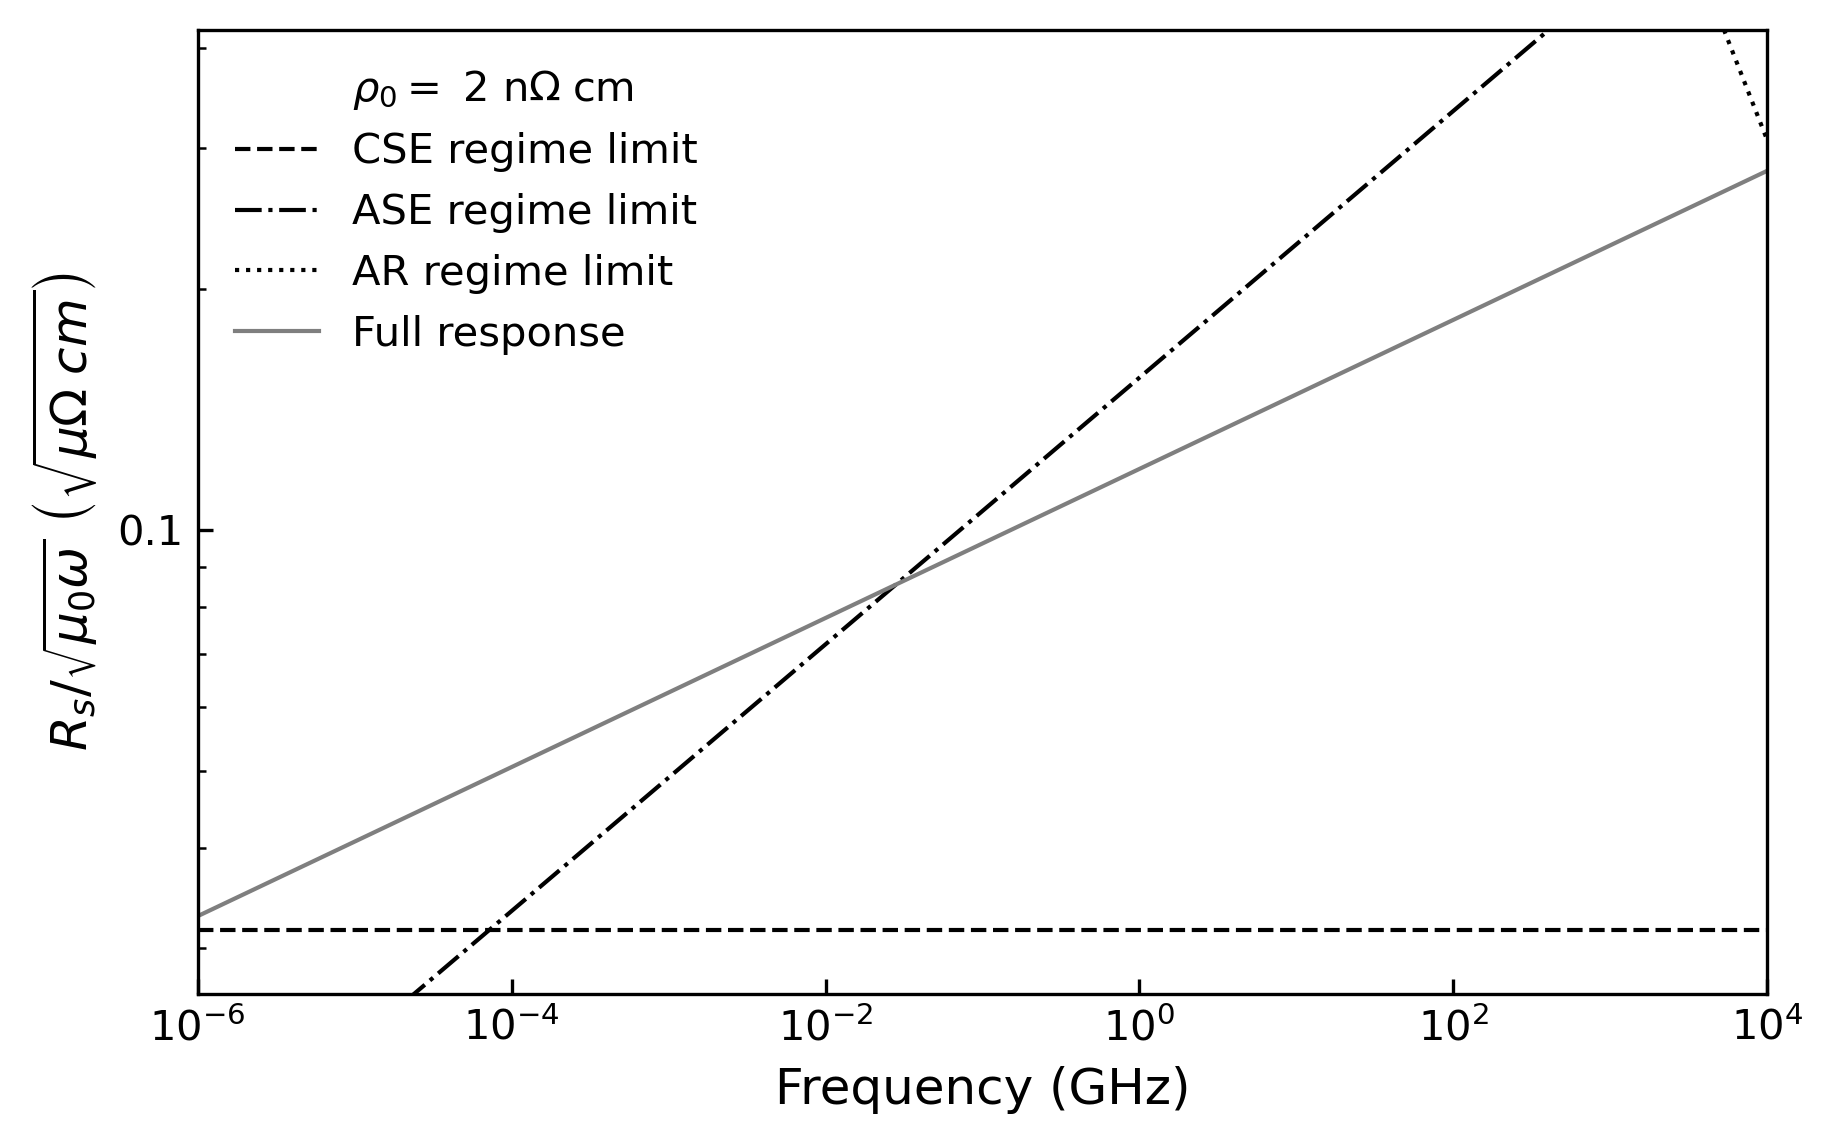

In [58]:
list_regime_names_plot = list_regime_names.copy()
freq_scale = GHz
freqs_plot = freq_calculate/freq_scale
Rs_scale = fh.Baker_scale(freqs_plot)


## Baker plot - real part
fh.set_plot_template('2ColWide')
fig, ax = plt.subplots()

# ax.plot([], [], alpha=0, label = string_gamma_l)
ax.plot([], [], alpha=0, label = string_resistivity_full)

plot_Zs_regime_limits(list_regime_names_plot, freqs_plot, Rs_scale)

ax.plot(freqs_plot, Zs_diffuse_isotropic.real/Rs_scale, color=AgAu_color, label='Full response')

# ax.axvline(freq_relaxation/freq_scale, color='k', alpha=0.2, label=r'$\gamma_{MR}/(2\pi)$')
# ax.axvline(freq_A_to_EA/freq_scale, color='k', alpha=0.2, label=label_AR_boundary)

ax.set_xlabel(label_lib.f_GHz)
ax.set_ylabel(label_lib.Rs_Baker)
ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_xlim(0.1*GHz, 0.5*GHz)
ax.set_xlim(*freq_filter)
ax.set_ylim(0.03,0.65)

y_formatter = fh.axis_formatter_talk_Rs_Baker
ax.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_minor_formatter('')

y_plot_min = np.min(Zs_diffuse_isotropic.real/Rs_scale)
y_plot_max = np.max(Zs_diffuse_isotropic.real/Rs_scale)
print(y_plot_min, y_plot_max)
ax.set_ylim(bottom=0.8*(y_plot_min), top=1.5*(y_plot_max))

plt.legend()

figure_filename = FS_model + f'_Analytic_Rs_Baker_{resistivity/1e-11:.3e}nOhmcm_{figure_filename_suffix}'
print(figure_filename)
filepath_figure_base = os.path.join(figure_directory, figure_filename)
if save_figures: fh.save_figure_as_svg_png_pdf(filepath_figure_base)

plt.show()

## $X_s(f)$ log-log

3.499907581904979e-07 2.3363272424754022
Sphere_Basic_01_Analytic_Xs_Log-Log_2.000e+00nOhmcm_ASE


<Figure size 2025x1251.55 with 0 Axes>

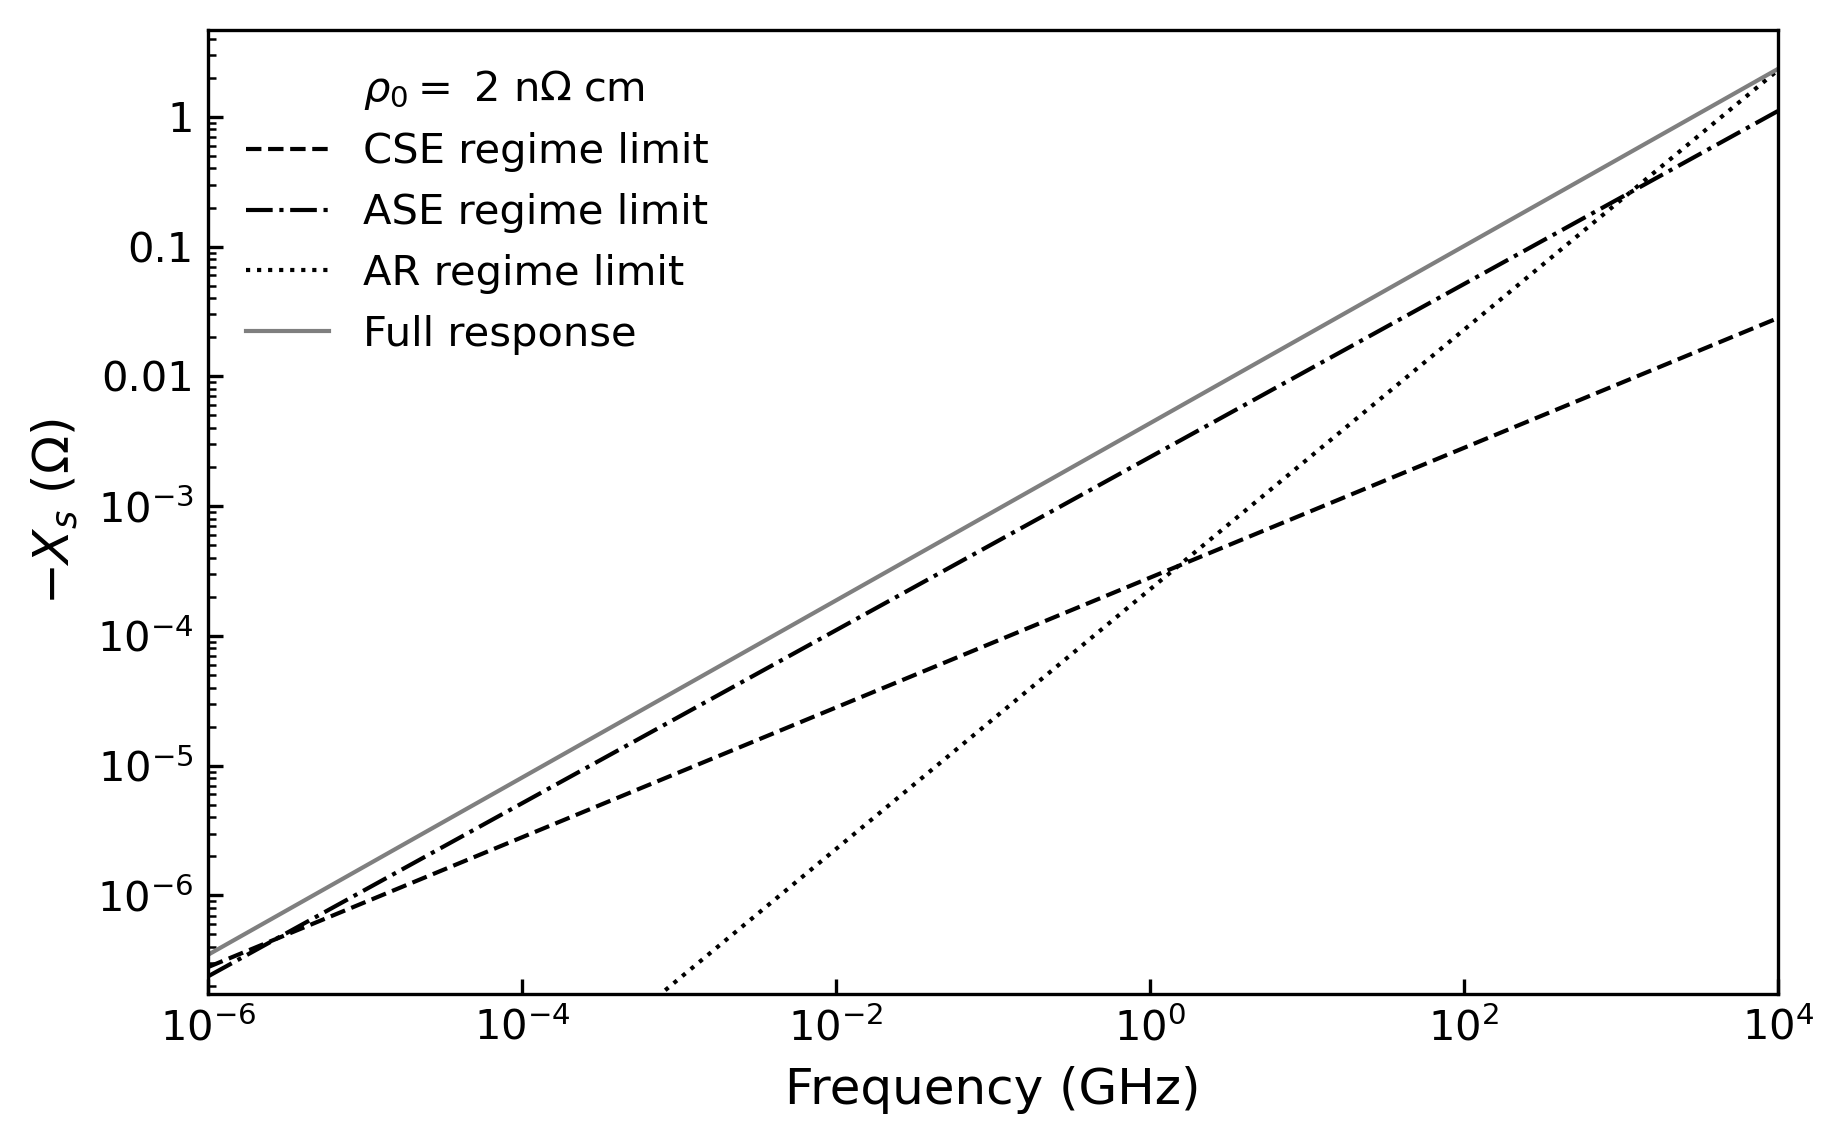

In [59]:
list_regime_names_plot = list_regime_names.copy()
Rs_scale = -1
freq_scale = GHz
freqs_plot = freq_calculate/freq_scale


fh.set_plot_template('2ColWide')
fig, ax = plt.subplots()

ax.plot([], [], alpha=0, label = string_resistivity_full)

plot_Zs_regime_limits(list_regime_names_plot, freqs_plot, Rs_scale, part='imag')

ax.plot(freqs_plot, Zs_diffuse_isotropic.imag/Rs_scale, color=AgAu_color, label='Full response')

# ax.axvline(freq_relaxation/freq_scale, color='k', alpha=0.2, label=r'$\gamma_{MR}/(2\pi)$')
# ax.axvline(freq_A_to_EA/freq_scale, color='k', alpha=0.2, label=label_AR_boundary)

ax.set_xlabel(label_lib.f_GHz)
ax.set_ylabel(r'$-$' + label_lib.Xs_Ohm)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(*freq_filter)
ax.set_ylim(1e-7,5)

y_formatter = fh.axis_formatter_talk_Rs_Baker
ax.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_minor_formatter('')

y_plot_min = np.min(Zs_diffuse_isotropic.imag/Rs_scale)
y_plot_max = np.max(Zs_diffuse_isotropic.imag/Rs_scale)
print(y_plot_min, y_plot_max)
ax.set_ylim(bottom=0.5*(y_plot_min), top=2*(y_plot_max))

plt.legend()

figure_filename = FS_model + f'_Analytic_Xs_Log-Log_{resistivity/1e-11:.3e}nOhmcm_{figure_filename_suffix}'
print(figure_filename)
filepath_figure_base = os.path.join(figure_directory, figure_filename)
if save_figures: fh.save_figure_as_svg_png_pdf(filepath_figure_base)

plt.show()

## $X_s(f)$ Baker plot

0.039387798752166824 2.629291919638019
Sphere_Basic_01_Analytic_Xs_Baker_2.000e+00nOhmcm_ASE


<Figure size 2025x1251.55 with 0 Axes>

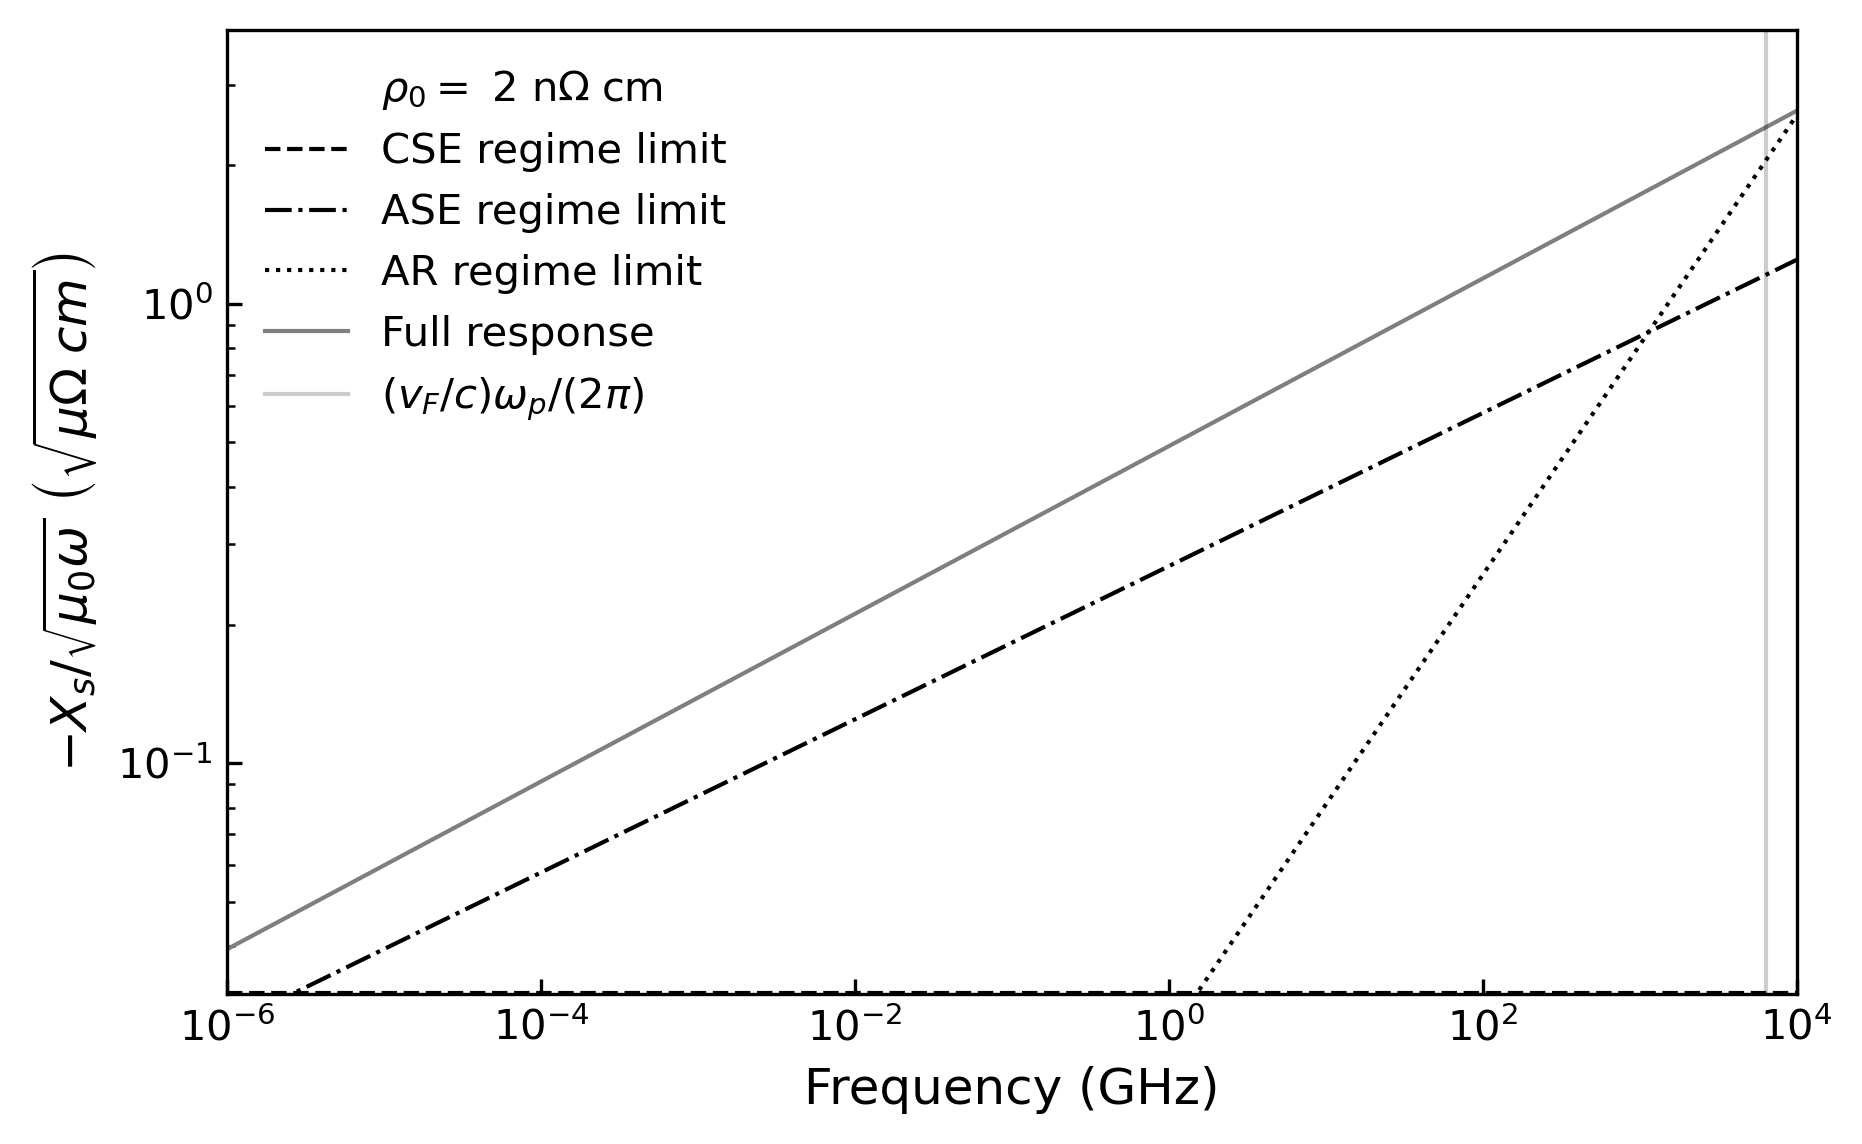

In [60]:
list_regime_names_plot = list_regime_names.copy()
freq_scale = GHz
freqs_plot = freq_calculate/freq_scale
Rs_scale = -fh.Baker_scale(freqs_plot)

fh.set_plot_template('2ColWide')
fig, ax = plt.subplots()

ax.plot([], [], alpha=0, label = string_resistivity_full)

plot_Zs_regime_limits(list_regime_names_plot, freqs_plot, Rs_scale, part='imag')

ax.plot(freqs_plot, Zs_diffuse_isotropic.imag/Rs_scale, color=AgAu_color, label='Full response')

# ax.axvline(freq_relaxation/freq_scale, color='k', alpha=0.2, label=r'$\gamma_{MR}/(2\pi)$')
ax.axvline(freq_A_to_EA/freq_scale, color='k', alpha=0.2, label=label_AR_boundary)

ax.set_xlabel(label_lib.f_GHz)
ax.set_ylabel(r'$-$' + label_lib.Xs_Baker)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(*freq_filter)
ax.set_ylim(0.02,5)

plt.legend()

y_plot_min = np.min(Zs_diffuse_isotropic.imag/Rs_scale)
y_plot_max = np.max(Zs_diffuse_isotropic.imag/Rs_scale)
print(y_plot_min, y_plot_max)
ax.set_ylim(bottom=0.8*(y_plot_min), top=1.5*(y_plot_max))

figure_filename = FS_model + f'_Analytic_Xs_Baker_{resistivity/1e-11:.3e}nOhmcm_{figure_filename_suffix}'
print(figure_filename)
filepath_figure_base = os.path.join(figure_directory, figure_filename)
if save_figures: fh.save_figure_as_svg_png_pdf(filepath_figure_base)

plt.show()

# Save model information and data for later reference if needed

In [44]:
figure_filename = FS_model + f'_Analytic_{resistivity/1e-11:.3e}nOhmcm_{figure_filename_suffix}'
print(figure_filename)
filepath_figure_base = os.path.join(figure_directory, figure_filename)

if save_figures:
    # Collect model parameters and results into a dictionary
    model_info = {
        'Model name': FS_model,
        'Figure filename base': figure_filename,
        'Parameters': {
            'Effective mass m*/m_0 (1)': m_eff_analytic/m_e,
            'Fermi energy E_F (eV)': E_F_analytic/electron_volt,
            'Fermi wavevector k_F (1/Angstrom)': k_F_analytic*angstrom,
            'Fermi velocity (m/s)': v_F_analytic,
            'Plasma frequency (Hz)': freq_plasma_analytic,
            'Resistivity (Ohm m)': resistivity,
            'Momentum-relaxing scattering rate gamma_MR (Hz)': gamma_MR_analytic,
            'Momentum-relaxing mean free path l_MR (m)': l_MR_analytic,
        },
        'Frequency boundaries': {
            'CSE to ASE (delta_cl = l_MR)': freq_C_to_A_length_scale,
            'CSE to ASE (R_s equal)': freq_C_to_A_Rs_diffuse,
            'Relaxation': freq_relaxation,
            'Anomalous reflection': freq_A_to_EA,
        },        
        'Frequency min and max (Hz)': (f_min, f_max),
        'Number of frequencies': f_num,
}
    
    # Save to JSON file with same base name as figure
    json_filename = filepath_figure_base + '.json'
    with open(json_filename, 'w') as f:
        json.dump(model_info, f, indent=4)

    data_filename = filepath_figure_base + '.dat'
    # Save frequency, Rs, Xs data to file
    # Create a pandas DataFrame with all the data
    data = pd.DataFrame({
        'f (Hz)': freq_calculate,
        'Rs (Ohm)': Zs_diffuse_isotropic.real,
        'Xs (Ohm)': Zs_diffuse_isotropic.imag,
        'Rs_CSE (Ohm)': Z_limits['CSE'].real,
        'Xs_CSE (Ohm)': Z_limits['CSE'].imag,
        'Rs_ASE_diffuse (Ohm)': Z_limits['ASE (diffuse surface scattering)'].real,
        'Xs_ASE_diffuse (Ohm)': Z_limits['ASE (diffuse surface scattering)'].imag,
        'Rs_relaxation (Ohm)': Z_limits['Relaxation'].real,
        'Xs_relaxation (Ohm)': Z_limits['Relaxation'].imag,
        'Rs_local (Ohm)': Z_limits['Local transport (Drude response)'].real,
        'Xs_local (Ohm)': Z_limits['Local transport (Drude response)'].imag,
        'Rs_anomalous_reflection (Ohm)': Z_limits['Anomalous reflection (diffuse surface scattering)'].real,
        'Xs_anomalous_reflection (Ohm)': Z_limits['Anomalous reflection (diffuse surface scattering)'].imag
    })
    
    # Save DataFrame to tab-separated file
    data.to_csv(data_filename, sep='\t', index=False)

Sphere_Basic_01_Analytic_2.000e+00nOhmcm_ASE
